In [ ]:
!pip install librosa
!pip install numba==0.49.1

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import numba
import math
import panel as pn

In [ ]:
# please upload "scales.txt" and type the filename or filepath as a string into filename
# if using collab, upload file to left menu
filename = 'Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video.wav'
print(filename)

Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video.wav


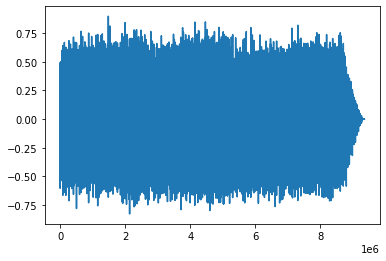

In [ ]:
# turns a file into an array

x, sr = librosa.load(filename, sr=44100)
plt.plot(x)

CQT, Chromagram, Tonnetz, and Tempogram Graph arrays assigned to CQ1, CH1, TN1, and TEM1 respectively


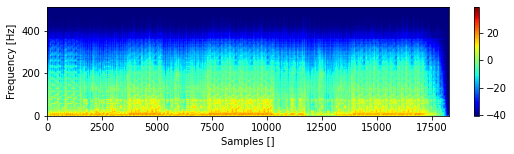

In [ ]:
F1 = librosa.stft(x, n_fft=1024, win_length=1024, hop_length=512)

plt.figure(figsize=(9,2))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Samples []')
plt.imshow(librosa.amplitude_to_db(np.abs(F1)), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

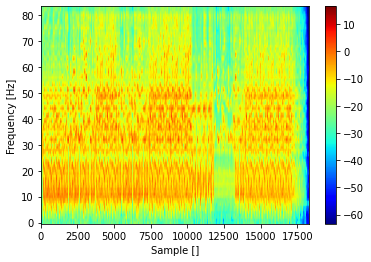

In [ ]:
CQ1 = librosa.core.cqt(x, sr=sr)

plt.ylabel('Frequency [Hz]')
plt.xlabel('Sample []')
plt.imshow(librosa.amplitude_to_db(np.abs(CQ1)), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

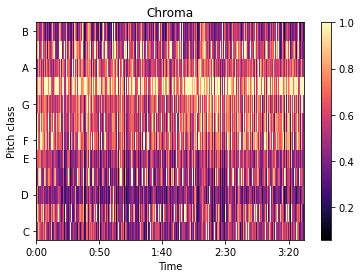

In [ ]:
CH1 = librosa.feature.chroma_cqt(x, sr)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
ax.set(title='Chroma')
img = librosa.display.specshow(CH1, y_axis='chroma', x_axis='time', sr=44100, ax=ax)
fig.colorbar(img, ax=ax)

In [ ]:
# function that determines the spectral flatness at a given sample in the data set
# on a scale of 0-1 with 1 being white noise
# https://en.wikipedia.org/wiki/Spectral_flatness
def flatness_index(chroma_x):
  flatness_sigma1 = 0
  for n in range(0, len(CH1)):
    x = np.log(CH1[n][chroma_x])
    flatness_sigma1 += x
  flatness_numerator = math.exp((1/12) * flatness_sigma1)

  flatness_sigma2 = 0
  for n in range (0, len(CH1)) :
    x = CH1[n][chroma_x]
    flatness_sigma2 += x
  flatness_denominator = (1/12) * flatness_sigma2

  flatness = flatness_numerator / flatness_denominator
  return flatness

print(CH1[1][0])

print(len(CH1[0]))

0.55498266
18265


In [ ]:
#sums the values in the array for each "bin" in the chromagram, only if the
# spectral flatness is below a threshold (to avoid whitenoise skewing data)
chroma_weights = []
for chroma in CH1:
  chroma_sum = 0
  for i in range(0, len(chroma)):
    if flatness_index(i) < .8:
      chroma_sum += chroma[i]
  chroma_weights.append(chroma_sum)

In [ ]:
# Assign the max term in array to 100 to standardize chromagram weight arrays
vector1 = np.array(chroma_weights)
vectorA = librosa.util.normalize(vector1)
vectorA = vectorA * 100
print(vectorA)

[ 80.72394559  53.60910783  58.86006446  38.49319933  30.64264607
  41.25546209  36.23061578  38.02415073  81.36332206  63.09121201
 100.          77.47606363]


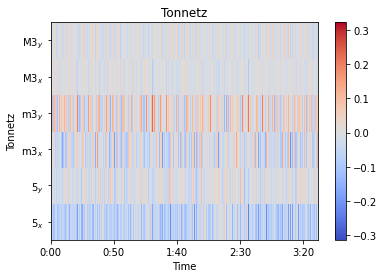

In [ ]:
TN1 = librosa.feature.tonnetz(x, sr)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
ax.set(title='Tonnetz')
img = librosa.display.specshow(TN1, y_axis='tonnetz', x_axis='time', sr=44100, ax=ax)
fig.colorbar(img, ax=ax)

In [ ]:

tonnetz_weights = []
for tonnetz in TN1:
  tonnetz_sum = 0
  for i in range(0, len(tonnetz)):
    if flatness_index(i) < .8:
      tonnetz_sum += tonnetz[i]
  tonnetz_weights.append(tonnetz_sum)
  
vector2 = np.array(tonnetz_weights)
vectorB = librosa.util.normalize(vector2)
vectorB = (vectorB * 50) + 50
print(vectorB)

[ 0.         79.66440783 41.04510975 44.89512707 28.96665534 37.11877535]


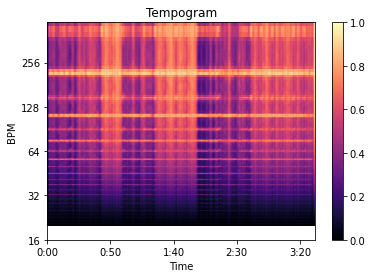

In [ ]:
TEM1 = librosa.feature.tempogram(x, sr)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
ax.set(title='Tempogram')
img = librosa.display.specshow(TEM1, y_axis='tempo', x_axis='time', sr=44100, ax=ax)
fig.colorbar(img, ax=ax)

In [ ]:
# calculates the average tempo of the song
TEM2 = librosa.beat.tempo(x, sr=sr)
print(TEM2)

[114.84375]


In [ ]:
# creates a text file, only run if no directory file (can be run to create txt file, but not necessary)
# file = open("directory.txt", "x")
# file.close()

In [ ]:
# opens directory.txt (created above)
# directory must be either empty or be correctly formatted
file = open("directory.txt", "a") # "a" means append

# creates an array that will be entered into the file
songEntry = [filename, TEM2[0]]
#appends the chroma weights from CH1
for i in range(0,12): 
	songEntry.append(vectorA[i])
for i in range(0,6):
  songEntry.append(vectorB[i])
 #converts into string to be added to directory.txt
strEntry = str(songEntry)
# adds strEntry to directory and closes
file.write(strEntry)
file.write("\n")
file.close()

In [ ]:
#Read the information in the directory

file1 = open("directory.txt", "r")

# creates an empty array
songArrays = []
comparison = []

#reads the first line in txt
directory = file1.readline()

#translates the string into an array of one string, and several floating pt num
directory_array = directory.split(', ')

directory_array[0] = directory_array[0][2:-1]
comparison.append(directory_array[0])
directory_array[-1] = directory_array[-1][0:-3]

for i in range(1,len(directory_array)):
  directory_array[i] = float(directory_array[i])

#adds the translated array to songArrays
songArrays.append(directory_array)

#repeats until all lines within directory are trans and put into songArrays
while directory:
  directory = file1.readline()
  directory_array = directory.split(', ')

  directory_array[0] = directory_array[0][2:-1]
  comparison.append(directory_array[0])
  directory_array[-1] = directory_array[-1][0:-3]

  for i in range(1,len(directory_array)):
    directory_array[i] = float(directory_array[i])
  
  songArrays.append(directory_array)

#eliminates any empty arrays in songArrays
for array in songArrays:
  if array == ['']:
    songArrays.remove(array)
for name in comparison:
  if name == '':
    comparison.remove(name)

print(comparison)

file1.close()


['Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video.wav']


In [ ]:
#reads the scales file to compare

file2 = open("scales.txt", "r")

# creates an empty array
scalesArray = []

#reads the first line in txt
scales = file2.readline()

#translates the string into an array of one string, and several floating pt num
scale_arr = scales.split(', ')

#removes filename and tempo from array
scale_arr.remove(scale_arr[0])
scale_arr.remove(scale_arr[0])
scale_arr[-1] = scale_arr[-1][0:-3]

for i in range(0,len(scale_arr)):
  scale_arr[i] = float(scale_arr[i])

#adds the translated array to scalesArray
scalesArray.append(scale_arr)

#repeats until all lines within directory are trans and put into scalesArrays
while scales:
  scales = file2.readline()
  scale_arr = scales.split(', ')

  scale_arr.remove(scale_arr[0])
  if len(scale_arr) >= 2:
    scale_arr.remove(scale_arr[0])
    scale_arr[-1] = scale_arr[-1][0:-3]

  for i in range(0,len(scale_arr)):
    scale_arr[i] = float(scale_arr[i])

  scalesArray.append(scale_arr)

for array in scalesArray:
  if array == ['']:
    scalesArray.remove(array)
  if array == []:
    scalesArray.remove(array)

print(scalesArray)

file1.close()

[[100.0, 20.202312801446688, 60.174332899709185, 16.251194824891098, 56.98637868024744, 53.64753718987579, 17.02108987911637, 61.246789517032575, 14.08925371613112, 49.94952521950521, 11.560796205463244, 53.26750806325974, 100.0, 92.1469548184306, 53.020343367230474, 78.81151543446913, 44.75521363533275, 52.267786295945], [71.41110811100755, 100.0, 19.366800359830524, 68.28655319597723, 16.731228519573424, 69.47557642683904, 66.64196843778298, 17.893922071665543, 69.28565367732072, 12.488204648396781, 62.465158663387896, 13.2354216144007, 0.0, 45.558358868920465, 31.168332803706196, 52.53360015341636, 52.90789382257303, 54.5031794241007], [16.305215073165375, 72.65355263491227, 100.0, 18.602804368634576, 68.33510046992208, 16.542560883174, 69.270588005228, 67.78374259377576, 16.452798494753075, 64.6718963396148, 11.647347333756587, 63.67243369248078, 100.0, 28.70606539166492, 48.71813578476242, 28.80427617280767, 52.12011165816108, 44.00691564147578], [72.61074077698399, 19.49364917304

In [ ]:
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
sortednotes = [x for _, x in sorted(zip(vector1, notes), reverse=True)]
print(sortednotes)

['A#', 'G#', 'C', 'B', 'A', 'D', 'C#', 'F', 'D#', 'G', 'F#', 'E']


In [ ]:
#generates ordered array of pieces similarity to a scale

vectorAs = []
for i in vectorA:
  vectorAs.append(i)
for i in vectorB:
  vectorAs.append(i)

npvector_as = np.array(vectorAs)

scale_sim = []

for i in range(0, len(scalesArray)):
  npvector_bs = np.array(scalesArray[i])
  dist = np.linalg.norm(npvector_as - npvector_bs)
  scale_sim.append(dist)

scale_closeness = [(scale_sim[i], notes[i]) for i in range(0,12)]
scale_closeness.sort()
print(scale_closeness)

[(116.20394626637477, 'A'), (116.20394626637477, 'G#'), (118.30348183075834, 'B'), (132.0718112729711, 'C#'), (132.18659259488624, 'D#'), (154.81044394540095, 'F#'), (155.9837746615486, 'F'), (169.6296870914115, 'C'), (180.74865133306005, 'G'), (181.01767987430324, 'E'), (182.64525522279445, 'A#'), (190.57803142248503, 'D')]


In [ ]:
#Creates a vector for the song being processed in code, matches format of arrays
# in songArrays
vectorA1 = []
for i in TEM2:
  vectorA1.append(i)
for i in vectorA:
  vectorA1.append(i)
for i in vectorB:
  vectorA1.append(i)

#translates vectorAa into a numpy array
npvector_a = np.array(vectorA1)


#calculates the difference between all songs in directory and prints result
distances=[]
for i in range(0, len(songArrays)):
  npvector_b = np.array(songArrays[i][1:len(songArrays[i])+1])
  dist = np.linalg.norm(npvector_a - npvector_b)
  print('The difference index between {1} and {2} is {0}'.format(dist, filename[0:-4], songArrays[i][0][0:-4]))
  distances += [dist]
print(distances)

The difference index between Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video and Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video is 7.105427357601002e-15
[7.105427357601002e-15]


In [ ]:
# matches with the index values above and orders them in ascending order
# comparison = ['Mary1', 'HotBuns', 'flute', 'roots', 'sevenths', 'triads', 'sample', 'Mary']
distancesandsongs = [(distances[i], comparison[i]) for i in range(len(comparison))]
distancesandsongs.sort()
print(distancesandsongs)

[(7.105427357601002e-15, 'Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video.wav')]


In [ ]:
with open('directory.txt', 'r') as r:
  for line in sorted(r):
    print(line, end='')

['Rick_Astley_-_Never_Gonna_Give_You_Up_Official_Music_Video.wav', 114.84375, 80.72394559349088, 53.60910782703709, 58.860064458046764, 38.49319933294457, 30.642646073045267, 41.25546208792429, 36.23061578319995, 38.02415072843686, 81.36332205958713, 63.0912120137269, 100.0, 77.47606362896644, 0.0, 79.66440782777471, 41.04510975357945, 44.895127068461406, 28.966655341207023, 37.118775352256684]
